# **Avaliar caracteristicas num grafo usando a biblioteca owlready2**

### Autor: Laura M. Parra
Data inicio: 11/01/2024

A avaliação de características em uma ontologia OWL pode envolver verificação de consistência, inferência de instâncias, extração de informações e consultas SPARQL. No Python, pode-ser utilizada a biblioteca owlready2 para trabalhar com ontologias OWL.

Consultar a documentação do owlready2 para obter mais informações: https://owlready2.readthedocs.io/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 55.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077432 sha256=2173a204e03f9c00016f8045030176386886981850362340b80c4c210f028b53
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [ ]:
!pip install graphviz

In [ ]:
# Importar a biblioteca owlready2
from owlready2 import *
from graphviz import Digraph

# Especifique o caminho do arquivo OWL que você fez o upload
path_to_owl_file = "/content/drive/MyDrive/Datasets/OntoGeoLogicaEntidadesNomeadas.owl"

# Carregue a ontologia
onto = get_ontology("file://" + path_to_owl_file).load()

Removemos a chamada sync_reasoner() antes da consulta SPARQL, pois a execução do raciocínio pode não ser necessária para operações de consulta SPARQL simples.


Usamos a função onto.classes() para obter todas as classes na ontologia e, em seguida, itera sobre elas para exibir os resultados. Este método deve funcionar sem o uso da consulta SPARQL.

In [ ]:
# Consulta SPARQL para obter todas as classes na ontologia
classes = list(onto.classes())

# Exibir todas as classes encontradas
print("Classes na ontologia:")
for classe in classes:
    print(classe)

Classes na ontologia:
OntoGeoLogicaEntidadesNomeadas.anthropogenic_fluid
OntoGeoLogicaEntidadesNomeadas.anthropogenic_material
OntoGeoLogicaEntidadesNomeadas.basin
OntoGeoLogicaEntidadesNomeadas.continuant
OntoGeoLogicaEntidadesNomeadas.disposition
OntoGeoLogicaEntidadesNomeadas.earth_fluid
OntoGeoLogicaEntidadesNomeadas.earth_material
OntoGeoLogicaEntidadesNomeadas.entity
OntoGeoLogicaEntidadesNomeadas.field
OntoGeoLogicaEntidadesNomeadas.generically_dependent_continuant
OntoGeoLogicaEntidadesNomeadas.geological_age
OntoGeoLogicaEntidadesNomeadas.geological_object
OntoGeoLogicaEntidadesNomeadas.geological_process
OntoGeoLogicaEntidadesNomeadas.geological_structure
OntoGeoLogicaEntidadesNomeadas.geological_time_interval
OntoGeoLogicaEntidadesNomeadas.immaterial_entity
OntoGeoLogicaEntidadesNomeadas.independent_continuant
OntoGeoLogicaEntidadesNomeadas.lithostratigraphic_unit
OntoGeoLogicaEntidadesNomeadas.material_entity
OntoGeoLogicaEntidadesNomeadas.object
OntoGeoLogicaEntidadesNomea

## **Visualizar a Hierarquia de Classes**

*   ### **Abordagem alternativa usando a biblioteca graphviz para visualizar a hierarquia de classes:**

Este código usa a biblioteca `graphviz` para criar um gráfico da hierarquia de classes na sua ontologia. Ele cria um arquivo PNG chamado Ontologia_Hierarquia.png no diretório atual do Colab e tenta abrir o visualizador de imagem padrão para mostrar o gráfico.

Lembrando que se o grafo é grande demais nao pode ser renderizado usando o renderizador de bitmap Cairo. Isso pode acontecer em ontologias grandes ou complexas. Para resolver isso, sao ajustados os parâmetros no Graphviz para tentar lidar com a complexidade do grafo.

In [ ]:
# Criar um gráfico dirigido para visualizar a hierarquia de classes
graph = Digraph('Ontologia', format='png')

# Adicionar classes ao gráfico
for classe in onto.classes():
    graph.node(classe.iri, label=classe.name)

# Adicionar relações de subclasse ao gráfico
for classe in onto.classes():
    for subclasse in classe.subclasses():
        graph.edge(classe.iri, subclasse.iri)

# Exibir o gráfico
# graph.render('/content/Ontologia_Hierarquia', format='png', cleanup=True, view=True)
graph.render('/content/drive/MyDrive/Datasets/OntoGeoLogicaEntidadesNomeadas_Hierarquia', cleanup=True, view=True)

'/content/Ontologia_Hierarquia.png'

## **Explorar Instâncias de uma Classe Específica:**

In [ ]:
# Escolha uma classe específica para explorar (substitua 'SuaClasse' pelo nome real da classe)
classe_escolhida = onto.field

# Exibir instâncias da classe escolhida
print(f"Instâncias de {classe_escolhida}:")
for instancia in classe_escolhida.instances():
    print(instancia)

Instâncias de OntoGeoLogicaEntidadesNomeadas.field:


## **Explorar as Subclasses de uma Classe Específica:**

In [ ]:
# Escolha a classe específica para explorar (substitua 'SuaClasse' pelo nome real da classe)
classe_escolhida = onto.field #material_entity

# Obtenha e exiba as subclasses da classe escolhida
subclasses = list(classe_escolhida.subclasses())
if subclasses:
    print(f"Subclasses de {classe_escolhida}:")
    for subclasse in subclasses:
        print(subclasse)
else:
    print(f"A classe {classe_escolhida} não tem subclasses.")

A classe OntoGeoLogicaEntidadesNomeadas.field não tem subclasses.


### **Explorar todas as subclasses (incluindo subclasses aninhadas) da classe escolhida:**

In [ ]:
# Obtenha e exiba todas as subclasses (incluindo subclasses aninhadas) da classe escolhida
todas_subclasses = list(classe_escolhida.descendants())
if todas_subclasses:
    print(f"Todas as subclasses de {classe_escolhida}:")
    for subclasse in todas_subclasses:
        print(subclasse)
else:
    print(f"A classe {classe_escolhida} não tem subclasses.")


Todas as subclasses de OntoGeoLogicaEntidadesNomeadas.material_entity:
OntoGeoLogicaEntidadesNomeadas.o&g_earth_fluid
OntoGeoLogicaEntidadesNomeadas.material_entity
OntoGeoLogicaEntidadesNomeadas.well
OntoGeoLogicaEntidadesNomeadas.unconsolidated_earth_material
OntoGeoLogicaEntidadesNomeadas.anthropogenic_fluid
OntoGeoLogicaEntidadesNomeadas.earth_fluid
OntoGeoLogicaEntidadesNomeadas.rock
OntoGeoLogicaEntidadesNomeadas.earth_material
OntoGeoLogicaEntidadesNomeadas.object_aggregate
OntoGeoLogicaEntidadesNomeadas.anthropogenic_material
OntoGeoLogicaEntidadesNomeadas.object


## **Navegar nas Propriedades:**

In [ ]:
# Iterar sobre as propriedades da ontologia
for propriedade in onto.object_properties():
    print(f"Propriedade: {propriedade}")
    print("  Domínio:", propriedade.domain)
    print("  Imagem:", propriedade.range)
    print("\n")

Propriedade: OntoGeoLogicaEntidadesNomeadas.age_of
  Domínio: []
  Imagem: []


Propriedade: OntoGeoLogicaEntidadesNomeadas.carrier_of
  Domínio: [OntoGeoLogicaEntidadesNomeadas.independent_continuant]
  Imagem: [OntoGeoLogicaEntidadesNomeadas.generically_dependent_continuant]


Propriedade: OntoGeoLogicaEntidadesNomeadas.characteristic_of
  Domínio: []
  Imagem: []


Propriedade: OntoGeoLogicaEntidadesNomeadas.concretizes
  Domínio: [OntoGeoLogicaEntidadesNomeadas.specifically_dependent_continuant]
  Imagem: [OntoGeoLogicaEntidadesNomeadas.generically_dependent_continuant]


Propriedade: OntoGeoLogicaEntidadesNomeadas.constituted_by
  Domínio: []
  Imagem: []


Propriedade: OntoGeoLogicaEntidadesNomeadas.crossed_by
  Domínio: []
  Imagem: []


Propriedade: OntoGeoLogicaEntidadesNomeadas.crosses
  Domínio: [OntoGeoLogicaEntidadesNomeadas.well]
  Imagem: [OntoGeoLogicaEntidadesNomeadas.geological_object]


Propriedade: OntoGeoLogicaEntidadesNomeadas.disposition_of
  Domínio: []
  Imagem

# **Visualização Grafos**

Para explorar um grafo no formato OWL mais detalhadamente, pode ser util utilizar visualizações gráficas interativas para uma exploração mais dinâmica. O uso da biblioteca networkx em conjunto com o matplotlib para visualização é uma boa opção para grafos com poucas entidades e subclasses.

Outra opção mais rápida e fácil pra grafos maiores pode ser o site: https://service.tib.eu/webvowl/, é só carregar o arquivo ontologia.owl e pronto!

In [24]:
from owlready2 import *
import networkx as nx
import matplotlib.pyplot as plt

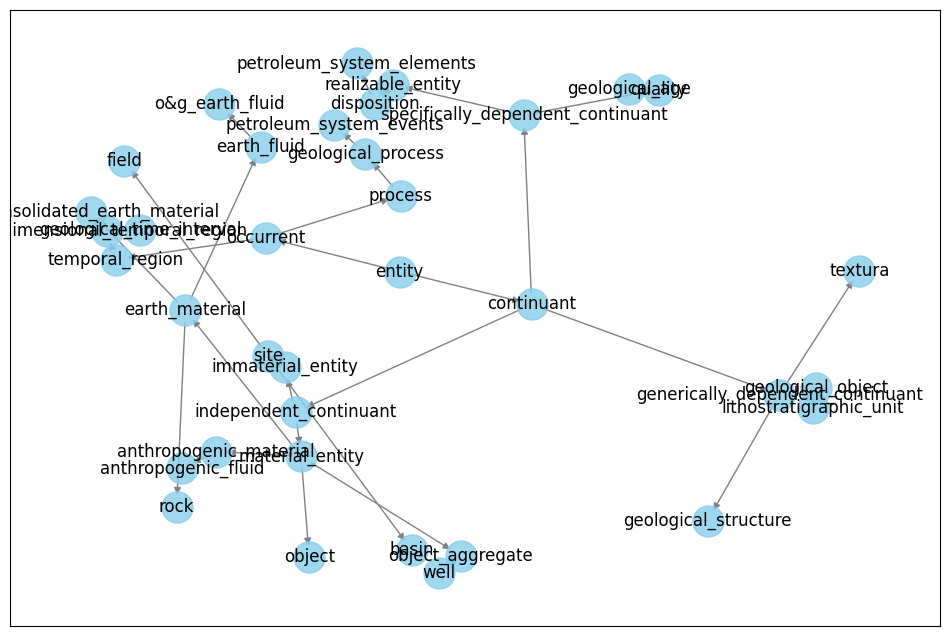

In [26]:
# Criar um grafo dirigido para representar as relações de subclasse
grafo2 = nx.DiGraph()

# Adicionar classes e relações de subclasse ao grafo
for classe in onto.classes():
    grafo2.add_node(classe.iri, label=classe.name)
    for subclasse in classe.subclasses():
        grafo2.add_edge(classe.iri, subclasse.iri)

# Desenhar o grafo usando matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(grafo2)
nx.draw_networkx_nodes(grafo2, pos, node_size=500, node_color="skyblue", alpha=0.8)
nx.draw_networkx_labels(grafo2, pos, labels=nx.get_node_attributes(grafo2, 'label'))
nx.draw_networkx_edges(grafo2, pos, edge_color="gray", arrows=True)

# Exibir o grafo interativo
plt.show()